 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>══════════════════════════════════╗

###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 6. MLP_basis**
# Homework 1. EMNIST 학습하기

## 8_Tensorflow을 이용한 Network Training


### _Objective_
* MNIST 보다 Class 수가 많아진, Extended MNIST을 학습시켜 봅니다.
 
╚═══════════════════════════════════════════════╝



In [1]:
# 우선 실행해 주세요 
!pip install tensorboardcolab
!pip install emnist
import tensorboardcolab

from emnist import extract_training_samples
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
import random
import pandas as pd
from tqdm import tqdm


Using TensorFlow backend.


## 문제 1.EMNIST 학습시키기 

EMNIST는 27개의 알파벳으로 이루어진 글자 데이터셋입니다.<br>
MNIST보다 훨신 더 많은 클래스로 이루어져 있습니다.<br>



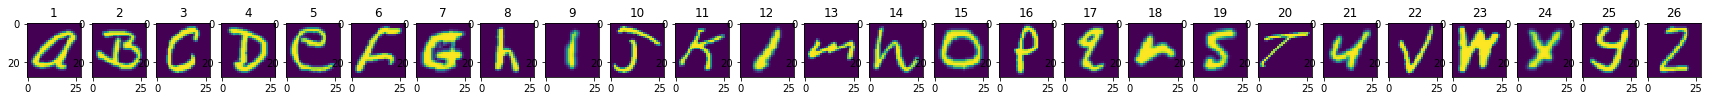

In [11]:
# 데이터를 시각화 합니다.
images, labels = extract_training_samples('letters')

n_unique = len(set(labels))
fig, axes = plt.subplots(1, n_unique)
fig.set_size_inches(30,10)
for ind in range(1,n_unique+1):
    ax = axes[ind-1]
    sample_index = np.where(labels == ind)[0][0]
    ax.imshow(images[sample_index])
    ax.set_title(str(ind))
              
plt.show()

아래와 같이 학습 데이터셋, 평가데이터셋, validation 데이터셋으로 나뉘어져 있습니다.<br>

In [12]:
# Train-Test Dataset Split
np.random.seed(1)
indices = np.arange(len(images))
np.random.shuffle(indices)

test_indices = indices[:len(images)//10]
valid_indices = indices[len(images)//10:2*len(images)//10]
train_indices = indices[2*len(images)//10:]

test_images, test_labels = images[test_indices], labels[test_indices]
valid_images, valid_labels = images[valid_indices], labels[valid_indices]
train_images, train_labels = images[train_indices], labels[train_indices]

print("test 데이터 셋 수 : ",len(test_indices))
print("validation 데이터 셋 수 : ",len(valid_indices))
print("train 데이터 셋 수 : ",len(train_indices))


print(len(train_labels))
print(len(valid_labels))

test_i = test_images
train_i = train_images
valid_i = valid_images

df_test_images = pd.DataFrame(np.reshape(test_i,(-1,28*28)))
df_train_images = pd.DataFrame(np.reshape(train_i,(-1,28*28)))
df_valid_images = pd.DataFrame(np.reshape(valid_i,(-1,28*28)))

#print(df_test_images.values[0])

df_train_images = (df_train_images - df_train_images.min(axis=0)) / (df_train_images.max(axis=0) - df_train_images.min(axis=0))
df_valid_images = (df_valid_images - df_valid_images.min(axis=0)) / (df_valid_images.max(axis=0) - df_valid_images.min(axis=0))
df_test_images = (df_test_images - df_test_images.min(axis=0)) / (df_test_images.max(axis=0) - df_test_images.min(axis=0))

#print(df_train_images.describe())
#print(df_valid_images.describe())
#print(df_test_images.values[0])
#print(df_test_images.describe())

test 데이터 셋 수 :  12480
validation 데이터 셋 수 :  12480
train 데이터 셋 수 :  99840
99840
12480


In [0]:
df_train_images[df_train_images.isna()] = 0
df_valid_images[df_valid_images.isna()] = 0
df_test_images[df_test_images.isna()] = 0

test_images = df_test_images
train_images = df_train_images
valid_images = df_valid_images

#df_train_images.describe()
#print(df_test_images.describe())

### 목표

> Test 데이터셋의 정확도가 **90%**가 넘는 Classification 모델을 구현해 주세요

In [0]:
# label을 one-hot encoding하기위함(tf.onehot()이 indice에서 0부터 시작)
valid_labels -= 1
train_labels -= 1
test_labels -= 1

In [23]:
train_labels.shape

(99840,)

#### 답안지 입력란
* 아래에 답을 서술하여 주세요

In [0]:
class EMNIST_DNN :
    def __init__(self):
        self.g_emnist = tf.Graph()
        self.units1 = 1500
        self.units2 = 1500
        self.units3 = 1000
        self.units4 = 500
        self.units5 = 100

    def data_import(self, x, label) :
        #flat, label reshape
        x_newshape = np.reshape(x, (-1, 28*28))
        #label = np.reshape(label, (-1,1))
        #label = np.array(label,dtype = float32)
        #label_onehot = tf.one_hot(label, 26)
        #sess = tf.Session()
        #label_onehot_ = sess.run(label_onehot)
        return x_newshape, label

    def model(self) :
        with self.g_emnist.as_default() :
            self.xs = tf.placeholder(dtype = tf.float32, shape=[None,28*28], name='xs')
            self.labels_raw = tf.placeholder(dtype=tf.int32, shape=[None], name='labels_')
            self.labels_ = tf.one_hot(self.labels_raw, 26)
            self.hidden1 = tf.layers.Dense(units=self.units1, activation=tf.nn.relu, 
                                           kernel_initializer=tf.random_normal_initializer(mean=0, stddev=tf.sqrt(2/self.units1)),
                                           name="hidden1")(self.xs)
            self.hidden2 = tf.layers.Dense(units=self.units2, activation=tf.nn.relu,
                                           kernel_initializer=tf.random_normal_initializer(mean=0, stddev=tf.sqrt(2/self.units2)),
                                           name="hidden2")(self.hidden1)
            self.hidden3 = tf.layers.Dense(units=self.units3, activation=tf.nn.relu,
                                           kernel_initializer=tf.random_normal_initializer(mean=0, stddev=tf.sqrt(2/self.units3)),
                                           name="hidden3")(self.hidden2)
            self.hidden4 = tf.layers.Dense(units=self.units4, activation=tf.nn.relu,
                                           kernel_initializer=tf.random_normal_initializer(mean=0, stddev=tf.sqrt(2/self.units4)),
                                           name="hidden4")(self.hidden3)
            self.hidden5 = tf.layers.Dense(units=self.units5, activation=tf.nn.relu,
                                            kernel_initializer=tf.random_normal_initializer(mean=0, stddev=tf.sqrt(2/self.units5)),
                                           name="hidden5")(self.hidden4)
            self.out = tf.layers.Dense(units=26 ,name="out")(self.hidden5)

    def loss_acc_cal(self) :
        with self.g_emnist.as_default() :
            print(self.out)
            self.loss = tf.losses.softmax_cross_entropy(self.labels_, self.out)
            self.soft_max_out = tf.nn.softmax(self.out, name='soft_max')
            self.acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.soft_max_out, axis = 1),
                                                       tf.argmax(self.labels_, axis=1)), tf.float32), axis=0, name='acc')

    def train(self, train_num, learning_rate) :
        self.train_num = train_num
        self.learning_rate = learning_rate
        self.xs_, self.ys_ = self.data_import(train_images, train_labels)
        self.xs_val, self.ys_val = self.data_import(valid_images, valid_labels)
        self.xs_test, self.ys_test = self.data_import(test_images, test_labels)
        self.loss_list = []
        self.acc_list = []
        self.vali_loss_list = []
        self.vali_acc_list = []
        self.loss_acc_cal()
        with self.g_emnist.as_default() :
            saver = tf.train.Saver()
            self.train_op = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)
            with tf.Session(graph = self.g_emnist) as sess :
                train_var = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
                print(train_var)
                sess.run(tf.global_variables_initializer())
                sess.run(tf.variables_initializer(train_var))
                for epoch in range(train_num):
                    _, loss_, acc_ = sess.run([self.train_op, self.loss, self.acc],
                                              feed_dict={self.xs : self.xs_,
                                                         self.labels_raw : self.ys_})
                    if epoch %10 == 0 :
                        print("train_loss : {:<10.3f}, train_acc : {:<10.3f}".format(loss_, acc_))
                        self.loss_list.append(loss_)
                        self.acc_list.append(acc_)
                    if epoch % 50 == 0 :
                        loss_val, acc_val = sess.run([self.loss, self.acc],
                                                     feed_dict={self.xs : self.xs_val,
                                                                self.labels_raw : self.ys_val})
                        print("valid_loss : {:<10.3f}, valid_acc : {:<10.3f}".format(loss_val, acc_val))
                        print("Epoch : {:<10}".format(epoch))
                        print("===========================================")
                        self.vali_loss_list.append(loss_val)
                        self.vali_acc_list.append(acc_val)
                    if self.vali_acc_list[-1] > 0.9:
                        print("validation acc: " ,self.vali_acc_list[-1])
                        saver.save(sess, "./tmp", global_step = epoch)
                        break;
        
    def visualize(self) :
        fig = plt.figure(figsize=(10,5))
        ax1 = fig.add_subplot(1,2,1)
        ax1.plot(np.arange(0, len(self.loss_list)), self.loss_list)
        ax1.plot(np.linspace(0, len(self.loss_list), len(self.vali_loss_list)), self.vali_loss_list)
        
        ax2 = fig.add_subplot(1,2,2)
        ax2.plot(np.arange(0, len(self.acc_list)), self.acc_list)
        ax2.plot(np.linspace(0, len(self.acc_list), len(self.vali_acc_list), self.vali_acc_list), self.vali_acc_list)
          

Tensor("out/BiasAdd:0", shape=(?, 26), dtype=float32)
Instructions for updating:
Use tf.cast instead.
[<tf.Variable 'hidden1/kernel:0' shape=(784, 1500) dtype=float32_ref>, <tf.Variable 'hidden1/bias:0' shape=(1500,) dtype=float32_ref>, <tf.Variable 'hidden2/kernel:0' shape=(1500, 1500) dtype=float32_ref>, <tf.Variable 'hidden2/bias:0' shape=(1500,) dtype=float32_ref>, <tf.Variable 'hidden3/kernel:0' shape=(1500, 1000) dtype=float32_ref>, <tf.Variable 'hidden3/bias:0' shape=(1000,) dtype=float32_ref>, <tf.Variable 'hidden4/kernel:0' shape=(1000, 500) dtype=float32_ref>, <tf.Variable 'hidden4/bias:0' shape=(500,) dtype=float32_ref>, <tf.Variable 'hidden5/kernel:0' shape=(500, 100) dtype=float32_ref>, <tf.Variable 'hidden5/bias:0' shape=(100,) dtype=float32_ref>, <tf.Variable 'out/kernel:0' shape=(100, 26) dtype=float32_ref>, <tf.Variable 'out/bias:0' shape=(26,) dtype=float32_ref>]
train_loss : 4.527     , train_acc : 0.038     
valid_loss : 3.693     , valid_acc : 0.053     
Epoch : 0 

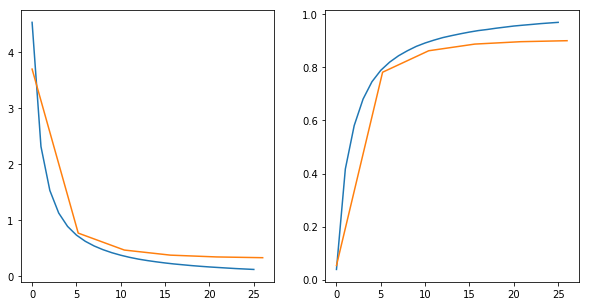

In [31]:
dnn1 = EMNIST_DNN()
dnn1.model()
dnn1.train(500, 0.0001)
dnn1.visualize()

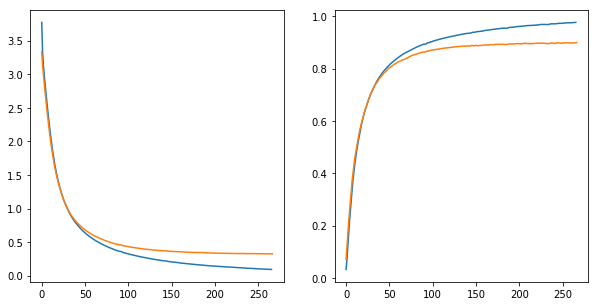

In [0]:
dnn1.visualize()

In [0]:
from tensorflow.python.training import checkpoint_utils as cp
print('저장된 변수의 이름을 불러옵니다')
var_names = cp.list_variables('./tmp-265')
print('저장된 변수의 이름 {}'.format(var_names))

저장된 변수의 이름을 불러옵니다
저장된 변수의 이름 [('hidden1/bias', [1500]), ('hidden1/kernel', [784, 1500]), ('hidden2/bias', [1500]), ('hidden2/kernel', [1500, 1500]), ('hidden3/bias', [1000]), ('hidden3/kernel', [1500, 1000]), ('hidden4/bias', [500]), ('hidden4/kernel', [1000, 500]), ('hidden5/bias', [100]), ('hidden5/kernel', [500, 100]), ('out/bias', [26]), ('out/kernel', [100, 26])]


In [32]:
#test set 검증을 위한 model restore
def data_import_test(x, label) :
    #flat, label reshape
    x_newshape = np.reshape(x, (-1, 28*28))
    #label_onehot = tf.one_hot(label, 26)
    #sess = tf.Session()
    #label_onehot_ = sess.run(label_onehot)
    return x_newshape, label

def test() :
    with tf.Session() as sess :
        xs_test, ys_test = data_import_test(test_images, test_labels)
        test_saver = tf.train.import_meta_graph("./tmp-250.meta")
        test_saver.restore(sess, "./tmp-250")
        g_test = tf.get_default_graph()
        #loss_test = g_test.get_tensor_by_name(name = "loss:0")
        loss_test = g_test.get_collection(tf.GraphKeys.LOSSES)
        acc_test = g_test.get_tensor_by_name(name = "acc:0")
        xs_test_p = g_test.get_tensor_by_name(name = "xs:0")
        labels_test_p = g_test.get_tensor_by_name(name = "labels_:0")
        loss_t, acc_t = sess.run([loss_test, acc_test], feed_dict = {xs_test_p : xs_test,
                                                                    labels_test_p : ys_test})
        print("test accuracy : {:<10.3f}".format(acc_t))
test()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./tmp-250
test accuracy : 0.899     


#  

<hr>
<div style = "background-image: url('https://algorithmai.io/static/media/logo.665798c4.png');background-repeat: no-repeat; background-position: right; background-size: 220px 40px; padding : 5px 10px 5px 5px;">
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/17
</div>
<hr>